# How many followers do the users have?
Currently just the 5 main bros

In [1]:
import pandas as pd

user_list = ["TobiasPetersen_", "AllanSchmidt", "torstenfroling", "gaard_Hans", "GringoWalking"]

username = user_list[0].lower()
    
print("User:       ", username)

file = "data/" + username + "/network/followers.ndjson"

df = pd.read_json(file, lines=True)
df = df[["id", "screen_name", "followers_count"]]
df["ori_user"] = username

for user in user_list[1:]:
    username = user.lower()
    
    print("User:       ", username)

    file = "data/" + username + "/network/followers.ndjson"

    data = pd.read_json(file, lines=True)
    data = data[["id", "screen_name", "followers_count"]]
    data["ori_user"] = username
    
    df = pd.concat([df, data])
    #print(data.head())
    #friends = data.screen_name
    followers_ids = data.id
    #print(followers_ids)
    
    print("Length of friends: ", len(followers_ids))

User:        tobiaspetersen_
User:        allanschmidt
Length of friends:  217
User:        torstenfroling
Length of friends:  66
User:        gaard_hans
Length of friends:  27
User:        gringowalking
Length of friends:  18


## Check out followers count

In [2]:
df["followers_count"].describe()

count       538.000000
mean       2493.903346
std       20529.981436
min           0.000000
25%          37.250000
50%         179.000000
75%         563.750000
max      386601.000000
Name: followers_count, dtype: float64

In [3]:
df[df["followers_count"] < 200]

id      screen_name  followers_count         ori_user
0             931797936     PhilNice1965               12  tobiaspetersen_
1   1318440003207336000   MathiasWiberg2                9  tobiaspetersen_
6             368625365  lonelymilkshake              113  tobiaspetersen_
7   1323783801584181200    HerritaKonadu               10  tobiaspetersen_
8            1195058502     Olivia_92604                9  tobiaspetersen_
..                  ...              ...              ...              ...
6   1243243613133443000  bredygtigborge1               21    gringowalking
9   1212435953807085600      danskeren12              158    gringowalking
10  1160478310616502300     VillyRammeby              147    gringowalking
11             27308798            GormT              159    gringowalking
13           2320287334      HolmKarsten                9    gringowalking

[283 rows x 4 columns]

In [4]:
df.sort_values("followers_count", ascending = False)

id      screen_name  followers_count         ori_user
65              32789366     jdbloodstone           386601   torstenfroling
187             16727022            Sonos           161612     allanschmidt
11             841910365  FitnessHacks101           154025   torstenfroling
175             18617285      LiamOConnor           134516  tobiaspetersen_
142           1020242461   JraissatiJorge            95449  tobiaspetersen_
..                   ...              ...              ...              ...
17    999742093915455500           Idas52                0     allanschmidt
96    738693821580599300  TheRealOliverDK                0     allanschmidt
27   1232335061934014500         fr_ulrik                0  tobiaspetersen_
22            2966804585  OldTimeMortimer                0  tobiaspetersen_
92   1295009760199225300     khan_denghis                0  tobiaspetersen_

[538 rows x 4 columns]

In [5]:
# For better visuals, remove the ones that have no followers
df_counts = df[df["followers_count"] > 10000]

df_counts

id      screen_name  followers_count         ori_user
142           1020242461   JraissatiJorge            95449  tobiaspetersen_
175             18617285      LiamOConnor           134516  tobiaspetersen_
181           1354082354    LisbethZornig            15515  tobiaspetersen_
138             23260256     Oneiorosgrip            10173     allanschmidt
167              7495132       iconfinder            25902     allanschmidt
187             16727022            Sonos           161612     allanschmidt
189             16467056       astridhaug            18150     allanschmidt
11             841910365  FitnessHacks101           154025   torstenfroling
41            2811748854          CUSP_uk            11790   torstenfroling
50              39002335        ellymelly            19648   torstenfroling
65              32789366     jdbloodstone           386601   torstenfroling
8     865555320453517300   Edward_Norden_            10460       gaard_hans
8    1129279740068737000    LizaRosen0000            21707    gringowalking

In [19]:
sum(df.followers_count) / len(df.followers_count)

df.max()
df.isnull().sum()


id                 0
screen_name        0
followers_count    0
ori_user           0
dtype: int64

TypeError: 'numpy.ndarray' object is not callable

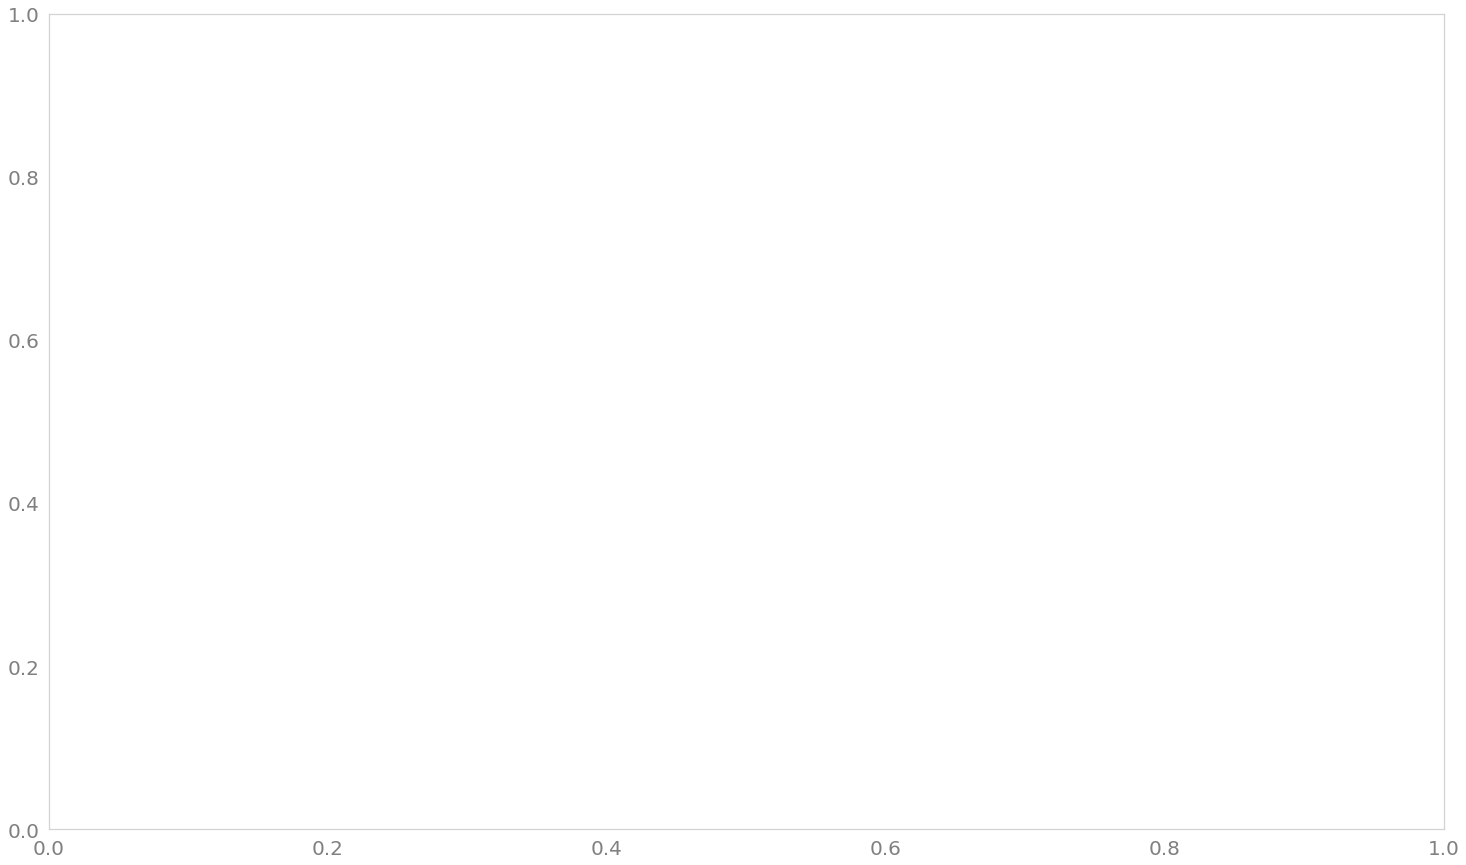

In [22]:
# Visualize this
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import numpy as np

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.histplot(data = df, x=df["followers_count"].values(), log_scale=True)

ax1.set(xlabel="Follower count", ylabel = "Count")
    
fig.suptitle("Followers_count distribution", size = "40")

#plot_name = "fig/survey_anxiety_visuals/" + "mean_anxiety_per_question" + ".png"
#fig.savefig(plot_name)

fig.show()

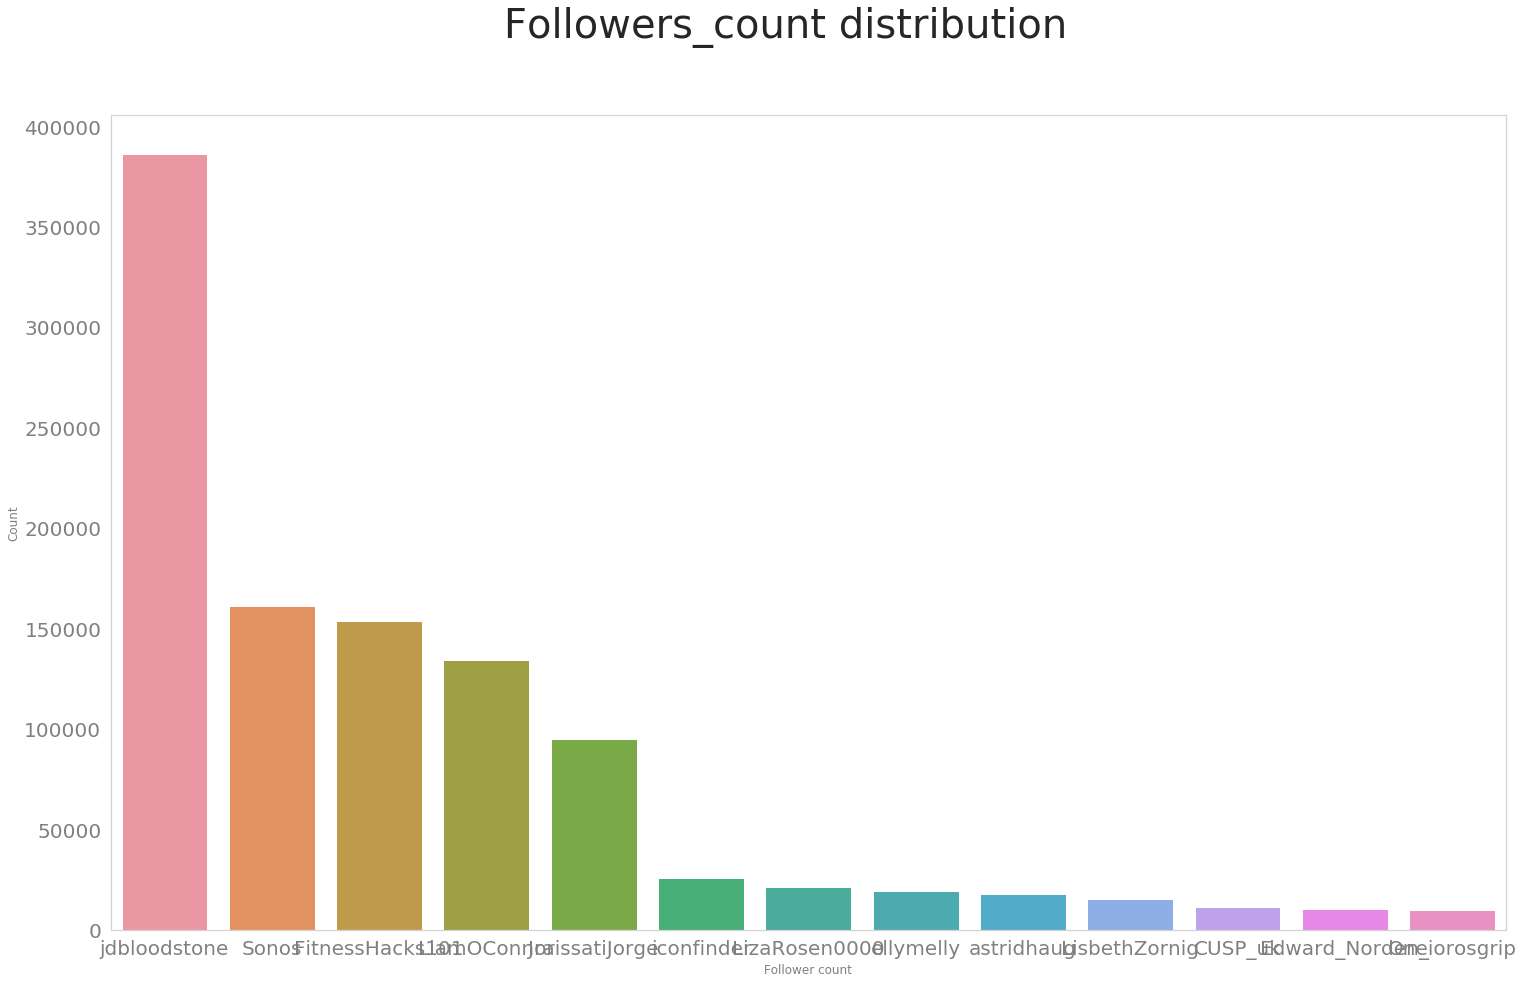

In [8]:
# Visualize this
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.barplot(data = df_counts.sort_values("followers_count", ascending=False), x="screen_name",y="followers_count", ax = ax1)

#ax1 = sns.lineplot(x="date", y="RT_freq", 
#                   label = "Retweeting", palette = palette[5],
#                     linewidth = 5, data = RT_counts_df)

ax1.set(xlabel="Follower count", ylabel = "Count")
#ax1.xaxis.get_label().set_fontsize(40)
#ax1.yaxis.get_label().set_fontsize(40)

#ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
#ax1.xaxis_date()
#date_form = mdates.DateFormatter("%d-%m")
#ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Followers_count distribution", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

#plot_name = "fig/survey_anxiety_visuals/" + "mean_anxiety_per_question" + ".png"
#fig.savefig(plot_name)

fig.show()

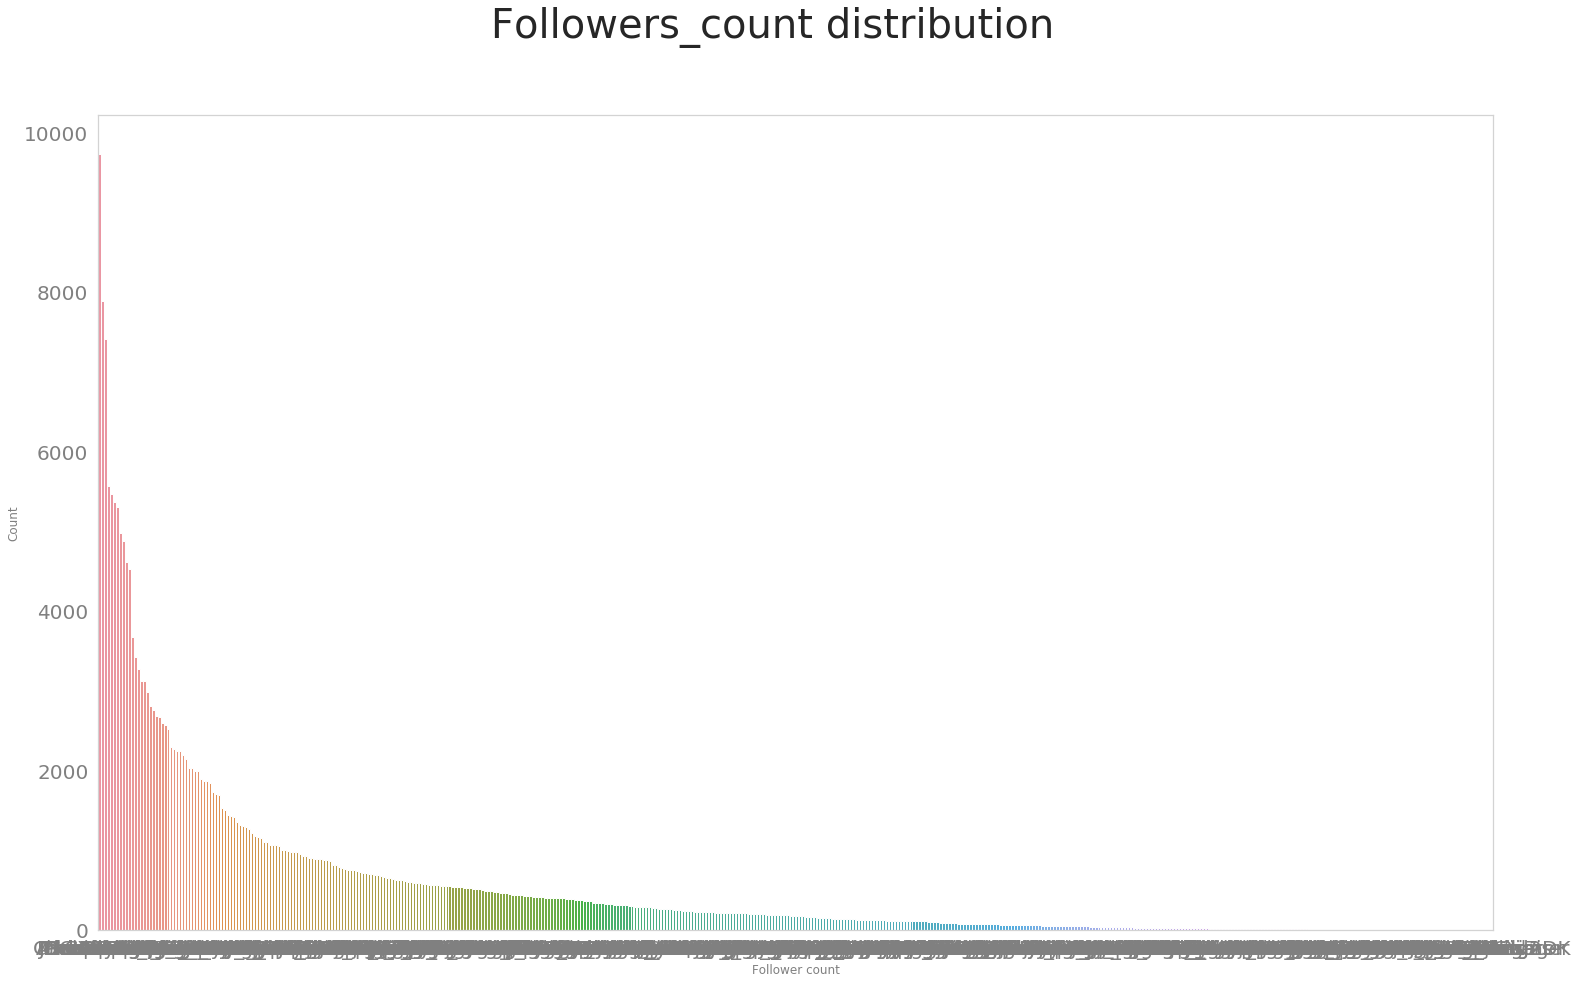

In [8]:
df_counts = df[df["followers_count"] <= 10000]


# Visualize this
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.barplot(data = df_counts.sort_values("followers_count", ascending=False), x="screen_name",y="followers_count", ax = ax1)

#ax1 = sns.lineplot(x="date", y="RT_freq", 
#                   label = "Retweeting", palette = palette[5],
#                     linewidth = 5, data = RT_counts_df)

ax1.set(xlabel="Follower count", ylabel = "Count")
#ax1.xaxis.get_label().set_fontsize(40)
#ax1.yaxis.get_label().set_fontsize(40)

#ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
#ax1.xaxis_date()
#date_form = mdates.DateFormatter("%d-%m")
#ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Followers_count distribution", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

#plot_name = "fig/survey_anxiety_visuals/" + "mean_anxiety_per_question" + ".png"
#fig.savefig(plot_name)

fig.show()

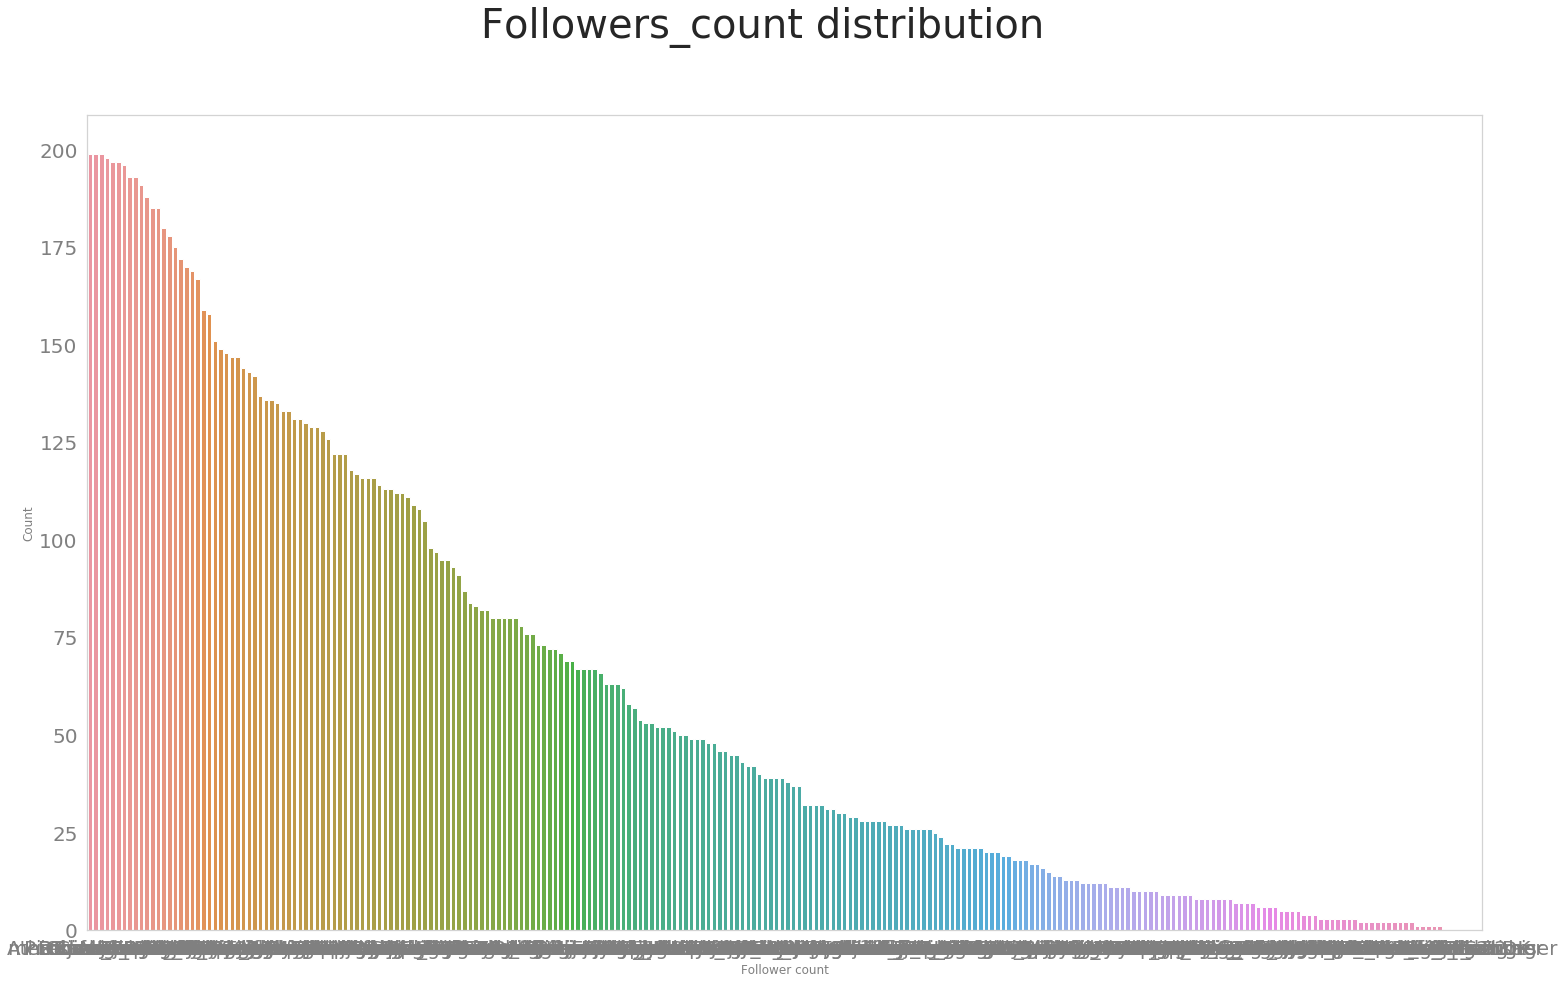

In [9]:
df_counts = df[df["followers_count"] <= 200]


# Visualize this
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.barplot(data = df_counts.sort_values("followers_count", ascending=False), x="screen_name",y="followers_count", ax = ax1)

#ax1 = sns.lineplot(x="date", y="RT_freq", 
#                   label = "Retweeting", palette = palette[5],
#                     linewidth = 5, data = RT_counts_df)

ax1.set(xlabel="Follower count", ylabel = "Count")
#ax1.xaxis.get_label().set_fontsize(40)
#ax1.yaxis.get_label().set_fontsize(40)

#ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
#ax1.xaxis_date()
#date_form = mdates.DateFormatter("%d-%m")
#ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Followers_count distribution", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

#plot_name = "fig/survey_anxiety_visuals/" + "mean_anxiety_per_question" + ".png"
#fig.savefig(plot_name)

fig.show()

## How many of the followers are the same?

In [2]:
df.drop_duplicates()

id     screen_name  followers_count         ori_user
0             931797936    PhilNice1965               12  tobiaspetersen_
1   1318440003207336000  MathiasWiberg2                9  tobiaspetersen_
2              26298982         JonasHz             1510  tobiaspetersen_
3              23584574        Edyano84              258  tobiaspetersen_
4             455702309   emil_jrgensen              629  tobiaspetersen_
..                  ...             ...              ...              ...
13           2320287334     HolmKarsten                9    gringowalking
14  1217440185648062500       numberto9              261    gringowalking
15           1404806785        McGoozzo             2249    gringowalking
16             41650054           mmncs             1302    gringowalking
17           2310682557      nielsp1985              212    gringowalking

[538 rows x 4 columns]

In [3]:
df.drop_duplicates("id")

id     screen_name  followers_count         ori_user
0             931797936    PhilNice1965               12  tobiaspetersen_
1   1318440003207336000  MathiasWiberg2                9  tobiaspetersen_
2              26298982         JonasHz             1510  tobiaspetersen_
3              23584574        Edyano84              258  tobiaspetersen_
4             455702309   emil_jrgensen              629  tobiaspetersen_
..                  ...             ...              ...              ...
11             27308798           GormT              159    gringowalking
13           2320287334     HolmKarsten                9    gringowalking
14  1217440185648062500       numberto9              261    gringowalking
15           1404806785        McGoozzo             2249    gringowalking
16             41650054           mmncs             1302    gringowalking

[479 rows x 4 columns]

In [5]:
len(df) - len(df.drop_duplicates("id"))

59

59 people follow more than just one person out of these 5

In [122]:
# Retweets dataset
retweets = pd.read_csv("retweets.csv")

retweets = retweets[["from_user_id"]]
retweets = retweets.rename(columns={"from_user_id": "id"})

dff = pd.merge(df, retweets).drop_duplicates()

In [123]:
# Let's see all of the duplicates
overlapping_followers = dff[dff["id"].duplicated(keep=False)].sort_values("id").reset_index(drop=True)

In [124]:
len(overlapping_followers.drop_duplicates("id"))

21

In [125]:
overlapping_followers.drop_duplicates("id")

id      screen_name  followers_count         ori_user
0     14805507          kaspers              452     allanschmidt
2     23584574         Edyano84              258  tobiaspetersen_
4     26594198     AllanSchmidt              217   torstenfroling
6     34715448        nannestad               69  tobiaspetersen_
8     41427359          lstroem               80   torstenfroling
11    51159004          JanusCL              896  tobiaspetersen_
13   120210261  siroptimizealot              142     allanschmidt
15   147873875           joveha              114  tobiaspetersen_
17   222394653         Noerloev               80  tobiaspetersen_
19   263843782    LarsHNielsen2              912     allanschmidt
21   296522552  JackOKristensen             4983   torstenfroling
23   298138880        AEgebjerg              126     allanschmidt
25   313487264          Flindty              229  tobiaspetersen_
27   842205487          Hva_saa             2519  tobiaspetersen_
29  1179886717        Johan_Nym              167     allanschmidt
31  1660402658      Velocipeden              706  tobiaspetersen_
33  2155744680           Tamen_              408     allanschmidt
35  2310682557       nielsp1985              212     allanschmidt
38  2785265103     nissen_bodil             1436  tobiaspetersen_
40  2985970265    jspangnielsen              135     allanschmidt
42  3042541739  KirstenSletbjer             1170   torstenfroling

In [121]:
# Retweets dataset
retweets = pd.read_csv("retweets.csv")

retweets = retweets[["from_user_id"]]
retweets = retweets.rename(columns={"from_user_id": "id"})

pd.merge(df, retweets).drop_duplicates()

id      screen_name  followers_count         ori_user
0                26298982          JonasHz             1510  tobiaspetersen_
9                23584574         Edyano84              258  tobiaspetersen_
186              23584574         Edyano84              258     allanschmidt
363             455702309    emil_jrgensen              629  tobiaspetersen_
377             842205487          Hva_saa             2519  tobiaspetersen_
...                   ...              ...              ...              ...
26491  865686971171123200            CJ1AJ             1421       gaard_hans
28059           548797479       StormJakob              339       gaard_hans
28092           266043591  FrederikBarfoed              260    gringowalking
28141            27308798            GormT              159    gringowalking
28182            41650054            mmncs             1302    gringowalking

[175 rows x 4 columns]

In [8]:
overlapping_followers[0:50]

id      screen_name  followers_count         ori_user
0     14805507          kaspers              452     allanschmidt
1     14805507          kaspers              452  tobiaspetersen_
2     23584574         Edyano84              258     allanschmidt
3     23584574         Edyano84              258  tobiaspetersen_
4     26594198     AllanSchmidt              217  tobiaspetersen_
5     26594198     AllanSchmidt              217   torstenfroling
6     34715448        nannestad               69  tobiaspetersen_
7     34715448        nannestad               69     allanschmidt
8     41427359          lstroem               80  tobiaspetersen_
9     41427359          lstroem               80   torstenfroling
10    41427359          lstroem               80     allanschmidt
11    51159004          JanusCL              896     allanschmidt
12    51159004          JanusCL              896  tobiaspetersen_
13   120210261  siroptimizealot              142       gaard_hans
14   120210261  siroptimizealot              142     allanschmidt
15   127473644         argilzar               72  tobiaspetersen_
16   127473644         argilzar               72     allanschmidt
17   147873875           joveha              114     allanschmidt
18   147873875           joveha              114  tobiaspetersen_
19   222394653         Noerloev               80     allanschmidt
20   222394653         Noerloev               80  tobiaspetersen_
21   263843782    LarsHNielsen2              912     allanschmidt
22   263843782    LarsHNielsen2              912  tobiaspetersen_
23   296522552  JackOKristensen             4983  tobiaspetersen_
24   296522552  JackOKristensen             4983   torstenfroling
25   298138880        AEgebjerg              126  tobiaspetersen_
26   298138880        AEgebjerg              126     allanschmidt
27   308290249   SimonBartholdy               31   torstenfroling
28   308290249   SimonBartholdy               31  tobiaspetersen_
29   313487264          Flindty              229     allanschmidt
30   313487264          Flindty              229  tobiaspetersen_
31   494935132   Herrevaerelset               45  tobiaspetersen_
32   494935132   Herrevaerelset               45     allanschmidt
33   842205487          Hva_saa             2519     allanschmidt
34   842205487          Hva_saa             2519  tobiaspetersen_
35  1179886717        Johan_Nym              167     allanschmidt
36  1179886717        Johan_Nym              167  tobiaspetersen_
37  1660402658      Velocipeden              706  tobiaspetersen_
38  1660402658      Velocipeden              706     allanschmidt
39  2155744680           Tamen_              408  tobiaspetersen_
40  2155744680           Tamen_              408     allanschmidt
41  2310682557       nielsp1985              212     allanschmidt
42  2310682557       nielsp1985              212   torstenfroling
43  2310682557       nielsp1985              212    gringowalking
44  2785265103     nissen_bodil             1436     allanschmidt
45  2785265103     nissen_bodil             1436  tobiaspetersen_
46  2985970265    jspangnielsen              135  tobiaspetersen_
47  2985970265    jspangnielsen              135     allanschmidt
48  3042541739  KirstenSletbjer             1170   torstenfroling
49  3042541739  KirstenSletbjer             1170    gringowalking

In [9]:
import networkx as nx

In [104]:
G = nx.from_pandas_edgelist(df, source = 'ori_user', target = 'screen_name')

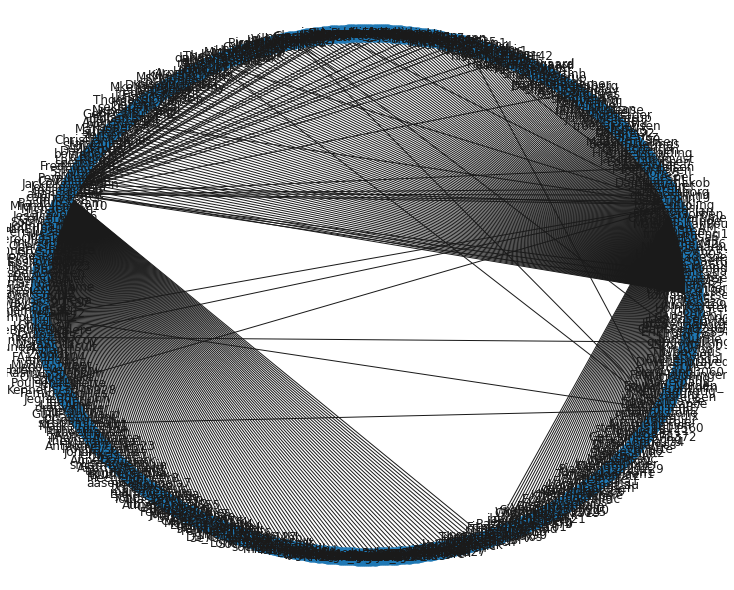

In [105]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [101]:
leaderboard = {}
for x in G.nodes:
    leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)

In [102]:
df2

connections
allanschmidt             217
tobiaspetersen_          210
torstenfroling            68
gaard_hans                27
gringowalking             18
...                      ...
larjanko                   1
Kasper_KM                  1
Thomas0Johansen            1
LiamOConnor                1
mmncs                      1

[483 rows x 1 columns]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
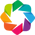

In [103]:
import math
import numpy as np
import pandas as pd
import holoviews as hv
import networkx as nx
from holoviews import opts
import colorcet
import community as community_louvain

import networkx as nx
import matplotlib.pyplot as plt

# This imports some nice graphics extensions
hv.extension('bokeh')

# Set the default sizes of the graphs
defaults = dict(width=800, height=400)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))

# Set print defaults of floats to have 3 decimal points
def print(*args):
    __builtins__.print(*("%.3f" % a if isinstance(a, float) else a
                         for a in args))

In [109]:
#first compute the best partition
partition = community_louvain.best_partition(nx.from_pandas_edgelist(df, source='ori_user', target='screen_name', edge_attr='followers_count'))

# Add partitions to the dataframe to get a cluster column
dfs = pd.DataFrame.from_dict([partition]).transpose().reset_index().rename(columns={0: "cluster"})#, index=[range(0,len(partition))])
#index should be source
dfs.columns = ['ori_user', 'cluster']
# Join based on source
df11 = pd.merge(df, dfs, on=['ori_user'])

# Make the network layout with 
G = nx.from_pandas_edgelist(df11, source='ori_user', target='screen_name')

In [111]:

# Create the hv graph
g = hv.Graph.from_networkx(G, nx.layout.spring_layout)#, k=3/math.sqrt(G.order()))

# Set options for the graph
g.opts(cmap="spectral", node_size="freq", edge_line_width=3, edge_line_color="grey",
              node_line_color='gray', node_color = "cluster", title = "May")#, inspection_policy='cluster')#, node_color='count')

# Add labels
#labels = hv.Labels(g.nodes, ['x', 'y'], 'index')
#g*labels.opts(text_font_size= "12pt")#"50pt")#"{1, 2, 3, 4, 5, 6}" )  #'10pt') ## This plots a graph with labels

:Graph   [start,end]

In [ ]:
df10 = pd.read_csv("data/hashtag_data/timebin_0_co_hashtags_rmv.csv")

# Remove coronavirus?
#df10 = df10[df10["source"] != "#coronavirus"]
#df10 = df10[df10["target"] != "#coronavirus"]

df10 = df10[df10["count"] > 1]

df10['source_log'] = np.log(df10['source_whole_freq'])*10 #*100
df10["target_log"] = np.log(df10["target_whole_freq"])*10 #*100

#first compute the best partition
partition = community_louvain.best_partition(nx.from_pandas_edgelist(df10, source='source', target='target', edge_attr='count'))

# Add partitions to the dataframe to get a cluster column
dfs = pd.DataFrame.from_dict([partition]).transpose().reset_index().rename(columns={0: "cluster"})#, index=[range(0,len(partition))])
#index should be source
dfs.columns = ['source', 'cluster']
# Join based on source
df11 = pd.merge(df10, dfs, on=['source'])

# Make the network layout with 
G = nx.from_pandas_edgelist(df11, source='source', target='target')

# Add node attributes
lol = df11.groupby(["source", "cluster"]).groups.keys()
lols = dict(lol)
pol = df11.groupby(["target", "cluster"]).groups.keys()
pols = dict(pol)

nx.set_node_attributes(G, lols, 'cluster')
nx.set_node_attributes(G, pols, 'cluster')
lol = df11.groupby(["source", "source_log"]).groups.keys()
lols = dict(lol)
pol = df11.groupby(["target", "target_log"]).groups.keys()
pols = dict(pol)

nx.set_node_attributes(G, lols, 'freq')
nx.set_node_attributes(G, pols, 'freq')

# Create the hv graph
g = hv.Graph.from_networkx(G, nx.layout.spring_layout, k=3/math.sqrt(G.order()))

# Set options for the graph
g.opts(cmap="spectral", node_size="freq", edge_line_width=3, edge_line_color="grey",
              node_line_color='gray', node_color = "cluster", title = "May")#, inspection_policy='cluster')#, node_color='count')

# Add labels
#labels = hv.Labels(g.nodes, ['x', 'y'], 'index')
#g*labels.opts(text_font_size= "12pt")#"50pt")#"{1, 2, 3, 4, 5, 6}" )  #'10pt') ## This plots a graph with labels

In [10]:
G = nx.Graph()

In [ ]:
# Create list of lists containing bigrams in tweets
#terms_bigram = list(bigrams(wordlist))
terms_bigram = [list(bigrams(tweet)) for tweet in freq_df['tokens_list']]
#terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_no_stop']]

# View bigrams for the first tweet
terms_bigram[0]

I need to get something that looks like:

[(User1, User2), (User3, User4), (User1, User4)]

I can make a df where "tokens_list" is "users_list" where I have the leadername and all his followers in a list!

In [88]:
d = df.drop_duplicates("ori_user").reset_index(drop=True)
d

id      screen_name  followers_count         ori_user
0            931797936     PhilNice1965               12  tobiaspetersen_
1  1237966644066037800     carinadexter               32     allanschmidt
2   895850799405953000  TheSpeakingPros              682   torstenfroling
3             48090820      ksorensen87              580       gaard_hans
4           1396709479        LarsNunne              755    gringowalking

In [89]:
l1 = df[df["ori_user"] == d["ori_user"][0]]["screen_name"].tolist()#.append("tobiaspetersen_")
l1.append(d["ori_user"][0])

l2 = df[df["ori_user"] == d["ori_user"][1]]["screen_name"].tolist()#.append("tobiaspetersen_")
l2.append(d["ori_user"][1])

l3 = df[df["ori_user"] == d["ori_user"][2]]["screen_name"].tolist()#.append("tobiaspetersen_")
l3.append(d["ori_user"][2])

l4 = df[df["ori_user"] == d["ori_user"][3]]["screen_name"].tolist()#.append("tobiaspetersen_")
l4.append(d["ori_user"][3])

l5 = df[df["ori_user"] == d["ori_user"][4]]["screen_name"].tolist()#.append("tobiaspetersen_")
l5.append(d["ori_user"][4])

In [90]:
ori_users = d.ori_user.tolist()
ori_users

['tobiaspetersen_',
 'allanschmidt',
 'torstenfroling',
 'gaard_hans',
 'gringowalking']

In [92]:
dd = {"ori_user": ori_users , "Userlist": [' '.join(l1), ' '.join(l2), ' '.join(l3), ' '.join(l4), ' '.join(l5)]}

ddd = pd.DataFrame(dd)

In [93]:
ddd["split_users"] = ddd.Userlist.str.split()

In [94]:
ddd

ori_user                                           Userlist  \
0  tobiaspetersen_  PhilNice1965 MathiasWiberg2 JonasHz Edyano84 e...   
1     allanschmidt  carinadexter MathiasWiberg2 dn77788 RasmusSkra...   
2   torstenfroling  TheSpeakingPros xLaurenRadx Poulsen7Linette po...   
3       gaard_hans  ksorensen87 DemoAll1ance goldendayze jeppekris...   
4    gringowalking  LarsNunne hald_per ErikJrg84788981 FaktaHoldni...   

                                         split_users  
0  [PhilNice1965, MathiasWiberg2, JonasHz, Edyano...  
1  [carinadexter, MathiasWiberg2, dn77788, Rasmus...  
2  [TheSpeakingPros, xLaurenRadx, Poulsen7Linette...  
3  [ksorensen87, DemoAll1ance, goldendayze, jeppe...  
4  [LarsNunne, hald_per, ErikJrg84788981, FaktaHo...

In [96]:
# Hashtag per row
# convert list of pd.Series then stack it
dd = (ddd
 .set_index(['ori_user'])['split_users']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_1', axis=1)
 .rename(columns={0:'hashtag'}))
#lowercase!
dd["hashtag"] = dd["hashtag"].str.lower()
dd

ori_user         hashtag
0    tobiaspetersen_    philnice1965
1    tobiaspetersen_  mathiaswiberg2
2    tobiaspetersen_         jonashz
3    tobiaspetersen_        edyano84
4    tobiaspetersen_   emil_jrgensen
..               ...             ...
538    gringowalking       numberto9
539    gringowalking        mcgoozzo
540    gringowalking           mmncs
541    gringowalking      nielsp1985
542    gringowalking   gringowalking

[543 rows x 2 columns]

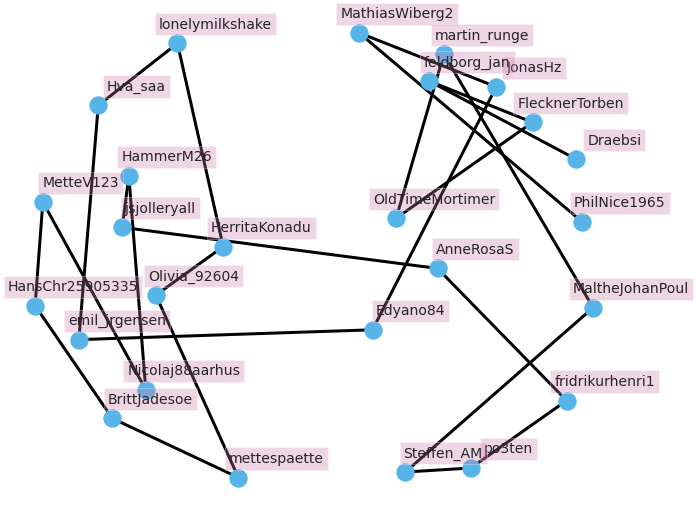

In [83]:
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# Create dictionary of bigrams and their counts
d = bigram_df.set_index("bigram").T.to_dict("records")
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 3))

fig, ax = plt.subplots(figsize=(11, 9))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color= palette[0], #'red',
                 node_color= palette[2], #'green',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.065
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor= palette[7], #'red', 
                      alpha=0.3), ## 0.5),
            horizontalalignment='center', fontsize=14)
    

fig.patch.set_visible(False)
ax.axis('off')

#plt.savefig("fig/bigram_graph.png", dpi=150)

plt.show()